# Частина третя: Аналіз датасет c Kaggle.com

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- Прочитайте csv файл (використовуйте функцію read_csv)
- Виведіть перші п'ять рядків (використовується функція head)
- Виведіть розміри датасету (використовуйте атрибут shape)
- Відповідь: Про скільки книг зберігає дані датасет?

In [2]:
tabs = pd.read_csv('./bestsellers with categories.csv', sep=',')
df = tabs.head()
display(df)
df = tabs
row, column = df.shape
print("column:", column)
print("row:", row)
print(f'Про скільки книг зберігає дані датасет? Відповідь: {row} книг')

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


column: 7
row: 550
Про скільки книг зберігає дані датасет? Відповідь: 550 книг


- Для спрощення подальшої роботи давайте трохи підправимо назви змінних.

In [3]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
df

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


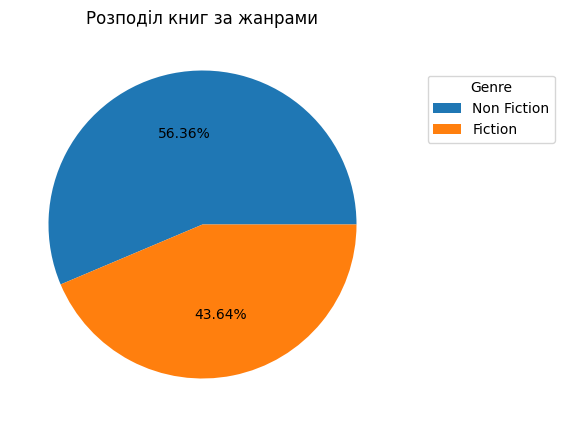

In [4]:
plt.figure(figsize=(5, 5))
data = df['genre'].value_counts()
labels = data.index
plt.pie(data,
        labels=None,
        autopct='%.2f%%')
plt.title('Розподіл книг за жанрами')
plt.ylabel('')
plt.legend(labels=data.index,
           loc="center",
           title="Genre",
           bbox_to_anchor=(1, 0.3, 0.5, 1))
plt.show()

# Первинне дослідження даних

- Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)
- Відповідь: Чи є в якихось змінних пропуски? (Так / ні)

In [5]:
sum_isna = df.isna().sum()
display(sum_isna)
omissions = "Так" if sum_isna.any() else "ні"
print()
print(f'Чи є в якихось змінних пропуски? (Так / ні) Відповідь: {omissions}')

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64


Чи є в якихось змінних пропуски? (Так / ні) Відповідь: ні


- Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)
- Відповідь: Які є унікальні жанри?

In [6]:
genre_unique = df['genre'].unique()
print(f'Які є унікальні жанри? Відповідь: {genre_unique}')

Які є унікальні жанри? Відповідь: ['Non Fiction' 'Fiction']


- Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')

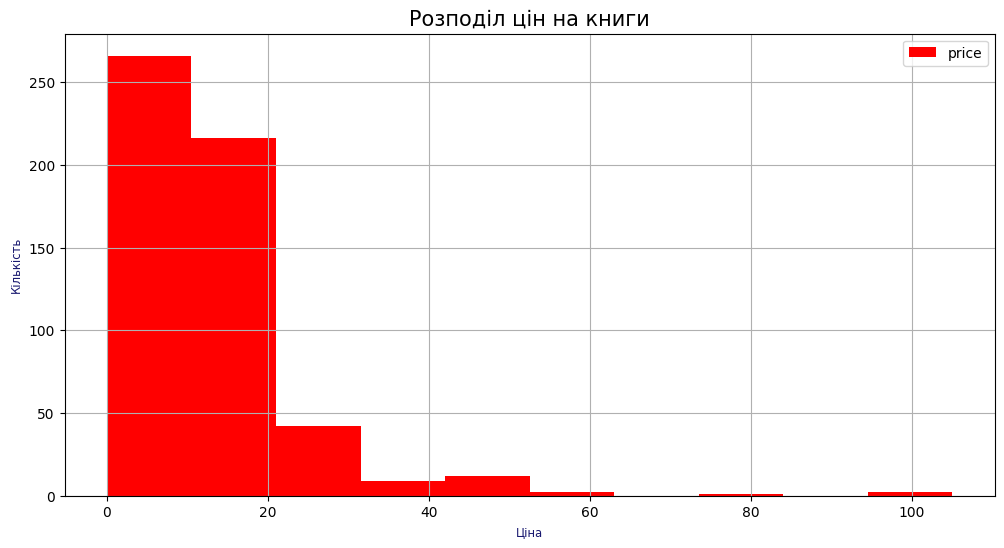

In [7]:
df['price'].plot(kind='hist', figsize=(12, 6), color=["r"],)
plt.xlabel('Ціна', fontsize='small', color='midnightblue')
plt.ylabel('Кількість', fontsize='small', color='midnightblue')
plt.title('Розподіл цін на книги', fontsize=15)
plt.legend()
plt.grid()

plt.show()

- Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)
-Відповідь: Максимальна ціна?
-Відповідь: Мінімальна ціна?
-Відповідь: Середня ціна?
-Відповідь: Медіанна ціна?

In [8]:
max, min, mean, median = df['price'].max(), df['price'].min(), df['price'].mean(), df['price'].median()
print(f'Максимальна ціна? Відповідь: {max}')
print(f'Мінімальна ціна? Відповідь: {min}')
print(f'Середня ціна? Відповідь: {mean}')
print(f'Медіанна ціна? Відповідь: {median}')

Максимальна ціна? Відповідь: 105
Мінімальна ціна? Відповідь: 0
Середня ціна? Відповідь: 13.1
Медіанна ціна? Відповідь: 11.0


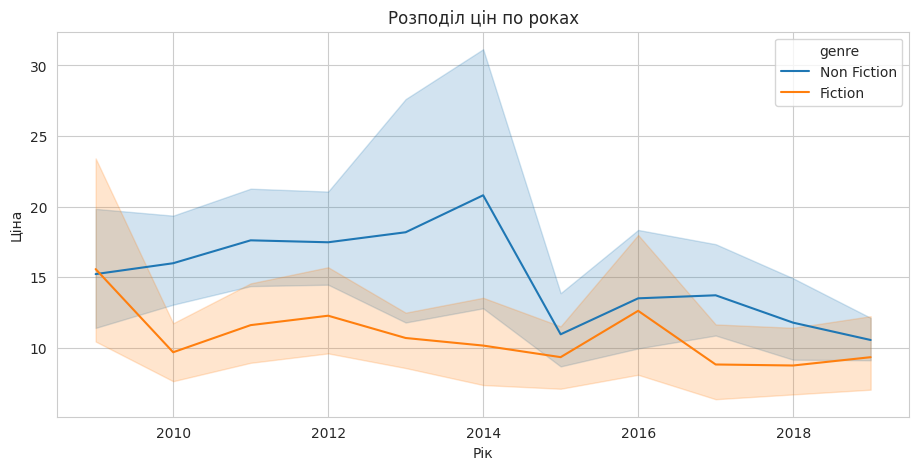

In [9]:
sns.set_style("whitegrid")
plt.figure(figsize=(11,5))
sns.lineplot(data=df, x='year', y='price', hue='genre')
plt.xlabel('Рік')
plt.ylabel('Ціна')
plt.title('Розподіл цін по роках')
plt.show()

# Пошук та сортування даних

- Відповідь: Який рейтинг у датасеті найвищий? Відповідь:
- Відповідь: Скільки книг мають такий рейтинг? Відповідь:
- Відповідь: Яка книга має найбільше відгуків? Відповідь:
-Відповідь: З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь:
-Відповідь: Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь:
- Відповідь: Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь:
- І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).
- Відповідь: Яка книга остання у відсортованому списку? Відповідь:

In [10]:

max_rating = df['user_rating'].max()
max_rating_books = df[df['user_rating'] == max_rating].shape[0]
book_max_reviews = df['name'][df['reviews'] == df['reviews'].max()].values[0]

top_50_2015 = df[df['year'] == 2015].sort_values(by='user_rating', ascending=False).head(50)
max_price_2015 = top_50_2015.loc[top_50_2015['price'].idxmax(), 'name']

top_50_2010 = df[df['year'] == 2010].sort_values(by='user_rating', ascending=False).head(50)
fiction_in_top_50_2010 = top_50_2010[top_50_2010['genre'] == 'Fiction'].shape[0]

books_10_11 = df[(df['year'] == 2010) | (df['year'] == 2011)]
books_max_rating_10_11 = books_10_11[books_10_11['user_rating'] == max_rating].shape[0]

books_2015_8 = df[(df['year'] == 2015) & (df['price'] < 8)].sort_values(by='price')
min_price_2015 = books_2015_8.head(1)['name'].values[0]

print(f'Який рейтинг у датасеті найвищий? Відповідь: {max_rating}')
print(f'Скільки книг мають такий рейтинг? Відповідь: {max_rating_books}')
print(f'Яка книга має найбільше відгуків? Відповідь: {book_max_reviews}')
print(f'З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь: {max_price_2015}')
print(f'Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь: {fiction_in_top_50_2010}')
print(f'Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь: {books_max_rating_10_11}')
print(f'Яка книга остання у відсортованому списку? Відповідь: {min_price_2015}')

Який рейтинг у датасеті найвищий? Відповідь: 4.9
Скільки книг мають такий рейтинг? Відповідь: 52
Яка книга має найбільше відгуків? Відповідь: Where the Crawdads Sing
З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь: Publication Manual of the American Psychological Association, 6th Edition
Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь: 20
Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь: 1
Яка книга остання у відсортованому списку? Відповідь: To Kill a Mockingbird


# Агрегування даних та з'єднання таблиць

- Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам
- Відповідь: Максимальна ціна для жанру Fiction: Відповідь

- Відповідь: Мінімальна ціна для жанру Fiction: Відповідь

- Відповідь: Максимальна ціна для жанру Non Fiction: Відповідь

- Відповідь: Мінімальна ціна для жанру Non Fiction: Відповідь

In [11]:
genre_price = df.groupby('genre')['price'].agg(['min', 'max'])

max_price_fiction = genre_price.loc['Fiction', 'max']
min_price_fiction = genre_price.loc['Fiction', 'min']
max_price_nonfiction = genre_price.loc['Non Fiction', 'max']
min_price_nonfiction = genre_price.loc['Non Fiction', 'min']

print(f'Максимальна ціна для жанру Fiction: Відповідь: {max_price_fiction}')
print(f'Мінімальна ціна для жанру Fiction: Відповідь: {min_price_fiction}')
print(f'Максимальна ціна для жанру Non Fiction: Відповідь: {max_price_nonfiction}')
print(f'Мінімальна ціна для жанру Non Fiction: Відповідь: {min_price_nonfiction}')

Максимальна ціна для жанру Fiction: Відповідь: 82
Мінімальна ціна для жанру Fiction: Відповідь: 0
Максимальна ціна для жанру Non Fiction: Відповідь: 105
Мінімальна ціна для жанру Non Fiction: Відповідь: 0


<ipython-input-19-3f0a8e19dfef>:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x='genre', y='price', data=df, palette='Set2', edgecolor = "g",
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 16.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 16.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


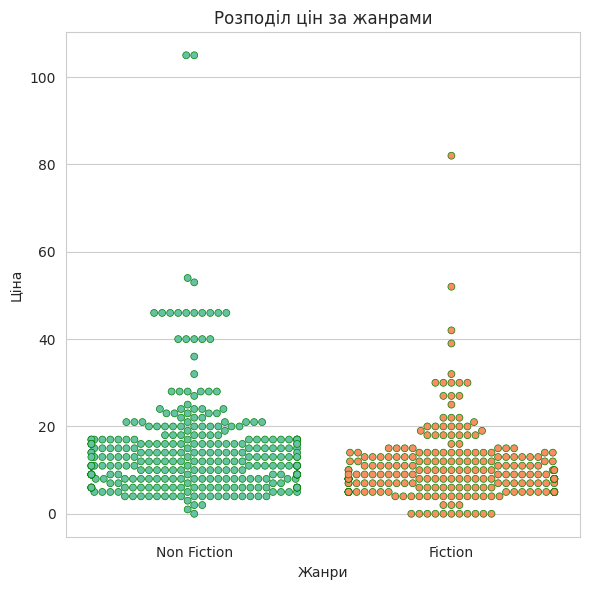

In [19]:
plt.figure(figsize=(6, 6))
sns.swarmplot(x='genre', y='price', data=df, palette='Set2', edgecolor = "g",
              linewidth = 0.5)
plt.xlabel('Жанри')
plt.ylabel('Ціна')
plt.title('Розподіл цін за жанрами')
plt.tight_layout()
plt.show()

- Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні

- Відповідь: Якої розмірності вийшла таблиця? Відповідь:

- Відповідь: Який автор має найбільше книг? Відповідь:

- Відповідь: Скільки книг цього автора? Відповідь:

In [13]:
author_books = df.groupby('author')['name'].agg(['count'])

table_size = author_books.shape
author_max_books = author_books['count'].idxmax()
author_count_books = author_books.max().values[0]

print(f'Якої розмірності вийшла таблиця? Відповідь: column - {table_size[0]}, rows - {table_size[1]}')
print(f'Який автор має найбільше книг? Відповідь: {author_max_books}')
print(f'Скільки книг цього автора? Відповідь: {author_count_books}')

Якої розмірності вийшла таблиця? Відповідь: column - 248, rows - 1
Який автор має найбільше книг? Відповідь: Jeff Kinney
Скільки книг цього автора? Відповідь: 12


- Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні

- Відповідь: У якого автора середній рейтинг мінімальний? Відповідь:

- Відповідь: Який у цього автора середній рейтинг? Відповідь:

In [14]:
author_books_avg = df.groupby('author')['user_rating'].agg(['mean'])

author_min_rating = author_books_avg['mean'].idxmax()
author_rating = author_books_avg.min().values[0]

print(f'У якого автора середній рейтинг мінімальний? Відповідь: {author_min_rating}')
print(f'Який у цього автора середній рейтинг? Відповідь: {author_rating}')

У якого автора середній рейтинг мінімальний? Відповідь: Alice Schertle
Який у цього автора середній рейтинг? Відповідь: 3.9


- З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну

- Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)

- Відповідь: Який автор перший у списку?

In [15]:
table_author_books = pd.concat([author_books, author_books_avg], axis=1)
table_author_books = table_author_books.rename(columns={'count': 'num_books', 'mean': 'avg_rating'})
sort_table = table_author_books.sort_values(['num_books', 'avg_rating'])
first_author = sort_table.index[0]

print(f'Який автор перший у списку? Відповідь: {first_author}')


Який автор перший у списку? Відповідь: Muriel Barbery


______________________________________________________________________________________________________